<a href="https://colab.research.google.com/github/20hnu/time_series/blob/main/ACF_PACF_and_AIC_BIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are essential tools in time series analysis, primarily used to identify patterns and dependencies in the data.**

# Autocorrelation Function (ACF):
The ACF measures the correlation between the time series and its lagged versions. It quantifies how a time series is related to its past values.

## Key Points:
- Purpose: Determines the overall pattern of autocorrelation across different lags.
- Range: Values range from -1 to 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no correlation.

##Interpretation:
- Positive ACF values suggest that past values are positively related to future values.
- Negative ACF values suggest an inverse relationship.

# Partial Autocorrelation Function (PACF):
The PACF measures the correlation between the time series and its lagged version, after removing the effects of all shorter lags.

## Key Points:
- Purpose: Identifies the direct relationship between observations at different lags, excluding intermediate lags.
- Interpretation:
A significant PACF at lag k means that the relationship at lag k is not due to correlations at shorter lags (1, 2, ..., k-1).

#ACF vs PACF in ARIMA Modeling:
- AR(p) Model: The PACF cuts off after p lags, while the ACF tails off gradually.
- MA(q) Model: The ACF cuts off after q lags, while the PACF tails off gradually.
- ARMA(p, q) Model: Both ACF and PACF tail off.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import numpy as np

In [ ]:
data =pd.Series([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])



#generate lag versions
lag_1 =data.shift(1)
lag_2 =data.shift(2)
lag_3 =data.shift(3)


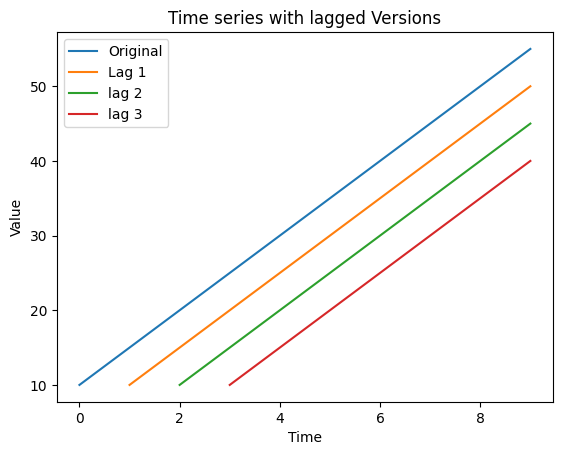

In [ ]:
plt.plot(data,label="Original")
plt.plot(lag_1, label="Lag 1")
plt.plot(lag_2, label= "lag 2")
plt.plot(lag_3, label="lag 3")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time series with lagged Versions")
plt.legend()
plt.show()


adfuller is used to test whether the series is satinoary or not.

In [ ]:
def check_stationary(series):
  result = adfuller(series)
  print("ADF Statistic: ", result[0])
  print("p-value: ", result[1])
  print("Critical Values: ")
  for key, value in result[4].items():
    print(f"{key}: {value}")
  if result[1] <= 0.05:
    print("The series is stationary")
  else:
    print("The series is not stationary")


In [ ]:
check_stationary(data)

ADF Statistic:  -0.3433088862515946
p-value:  0.9191425845563238
Critical Values: 
1%: -4.9386902332361515
5%: -3.477582857142857
10%: -2.8438679591836733
The series is not stationary


**A stationary time series is a series whose statistical properties—such as mean, variance, and autocorrelation—do not change over time. In simpler terms, the data's behavior remains consistent regardless of the point in time you observe it**
#Transforming a Non-Stationary Series to Stationary:
- Differencing: Subtract the current value from the previous value (
𝑌
𝑡
−
𝑌
𝑡
−
1
Y
t
​
 −Y
t−1
​
 ).
- Log Transformation: Helps stabilize variance.
- Detrending: Remove a trend using regression or smoothing.
- Seasonal Adjustment: Remove seasonality by subtracting the seasonal component.


In [ ]:
diff_data = data.diff()
diff_data.dropna(inplace=True)

In [ ]:
dateparse = lambda x: datetime.strptime('190'+x, "%Y-%m")

DataFrames with a single column or a single row are squeezed to a Series.

In [ ]:
series_2 = pd.read_csv('/content/drive/MyDrive/Campus_X_share/ARIMA_code/shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)

<ipython-input-8-3c7fbf57755c>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series_2 = pd.read_csv('/content/drive/MyDrive/Campus_X_share/ARIMA_code/shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)


In [ ]:
type(series_2)

pandas.core.frame.DataFrame

In [ ]:
series_2 = series_2.squeeze()

In [ ]:
type(series_2)

pandas.core.series.Series

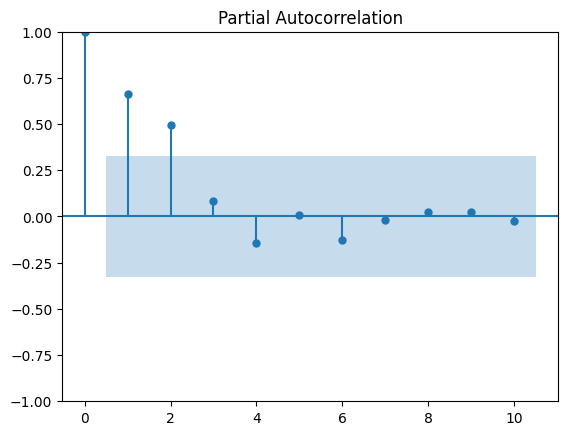

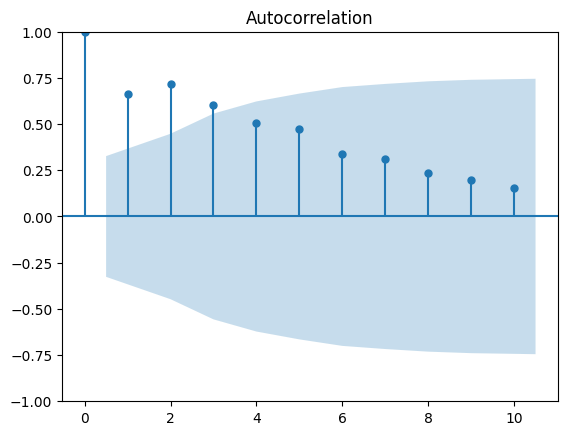

In [ ]:
plot_pacf(series_2, lags=10)
plot_acf(series_2, lags=10)
plt.show()

In [ ]:
series_diff= series_2.diff().dropna(inplace=True)

**AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are statistical metrics used to evaluate and compare models, particularly in time series analysis and regression. They help balance model complexity and goodness-of-fit by penalizing models with too many parameters.**

# Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

## 1. Akaike Information Criterion (AIC)
AIC estimates the relative quality of a statistical model by balancing the goodness-of-fit and the complexity of the model.

### Formula:
\[
\text{AIC} = 2k - 2\ln(L)
\]
Where:  
- \(k\) = number of parameters in the model  
- \(L\) = maximum likelihood of the model (goodness-of-fit)

### Key Points:
- **Objective:** Minimize AIC for the best model.
- **Interpretation:** A lower AIC value indicates a better model among those being compared.
- **Penalty:** AIC penalizes the number of parameters to avoid overfitting.

### Example Use:
In time series (e.g., ARIMA), AIC helps determine the optimal lags by comparing models with different parameters.

---

## 2. Bayesian Information Criterion (BIC)
BIC is similar to AIC but imposes a stronger penalty for the number of parameters. It is derived from Bayesian principles and incorporates sample size in the penalty.

### Formula:
\[
\text{BIC} = k \ln(n) - 2\ln(L)
\]
Where:  
- \(n\) = number of data points  
- \(k\) = number of parameters in the model  
- \(L\) = maximum likelihood of the model

### Key Points:
- **Objective:** Minimize BIC for the best model.
- **Interpretation:** A lower BIC value indicates a better model.
- **Penalty:** BIC penalizes model complexity more heavily than AIC, especially for larger datasets.

### Example Use:
In model selection for regression or time series, BIC can help avoid overfitting more aggressively than AIC.

---

## Differences Between AIC and BIC

| **Aspect**                | **AIC**                               | **BIC**                                |
|---------------------------|----------------------------------------|----------------------------------------|
| **Penalty Strength**       | Moderate penalty for more parameters   | Stronger penalty for more parameters   |
| **Sample Size Impact**     | Does not explicitly account for sample size | Includes sample size in the penalty    |
| **Overfitting Tendency**   | More likely to select complex models   | More likely to select simpler models   |
| **Application**            | Preferred for smaller datasets or exploratory analysis | Preferred for larger datasets or final model selection |

---

## Summary:
- **AIC** focuses more on the goodness-of-fit with a moderate penalty for complexity, making it useful for model exploration.
- **BIC** focuses more on simplicity, favoring models with fewer parameters, especially for larger datasets.

### Practical Use:
- Use **AIC** when the primary goal is prediction accuracy.
- Use **BIC** when the focus is on model parsimony and interpretability.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
series_3 = pd.read_csv("/content/drive/MyDrive/Campus_X_share/ARIMA_code/daily-total-female-births.csv", header=0, index_col=0)

In [ ]:
series_3 = series_3.squeeze()

In [ ]:
series_3

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
check_stationary(series_3)

ADF Statistic:  -4.808291253559765
p-value:  5.2434129901498554e-05
Critical Values: 
1%: -3.448748905151901
5%: -2.8696473721448728
10%: -2.5710891239349585
The series is stationary


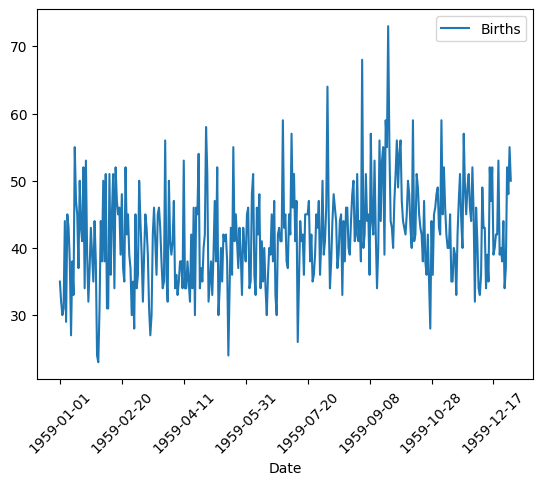

In [ ]:
series_3.plot(legend=True)
plt.xticks(rotation=45)
plt.show()

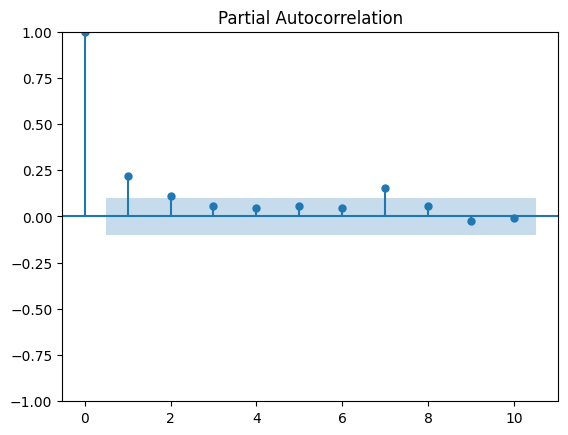

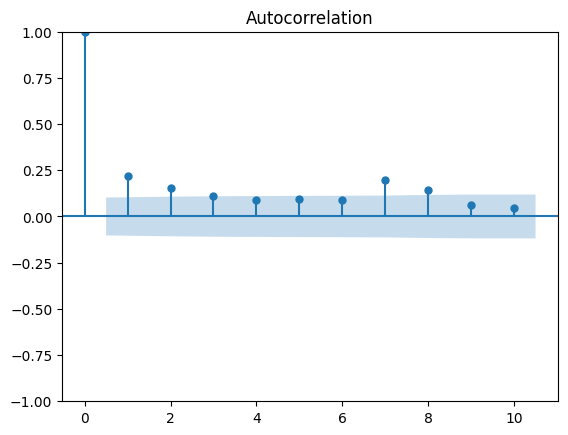

In [ ]:
plot_pacf(series_3, lags=10)
plot_acf(series_3, lags=10)
plt.show()

##We can check AR(1), AR(2), AR(7)

In [ ]:
ar_orders=[1,2,7]
fitted_model_dict = {}
for idx, ar_order in enumerate(ar_orders):
  ar_model = ARIMA(series_3, order=(ar_order, 0, 0))
  model_fit = ar_model.fit()
  fitted_model_dict[f"AR{ar_order}"] = model_fit


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
for ar_order in ar_orders:
  print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[f"AR{ar_order}"].aic))
  print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[f"AR{ar_order}"].bic))
  print("****************************************")

AIC for AR(1): 2479.080627834601
BIC for AR(1): 2490.7803198953484
******************************************************
AIC for AR(2): 2476.363657107182
BIC for AR(2): 2491.963246521512
******************************************************
AIC for AR(7): 2472.778262629018
BIC for AR(7): 2507.8773388112604
******************************************************


## If we treat this as a ARMA process


In [ ]:
from itertools import product

p_values = range(1,3)
q_values = range(1,3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
  arma_model = ARIMA(series_3, order=(p, 0, q))
  model_fit = arma_model.fit()
  fitted_model_dict[f"ARMA({p},{q})"] = model_fit

  print('AIC for ARMA(%s,%s): %s'%(p, q, model_fit.aic))
  print('BIC for ARMA(%s,%s): %s'%(p, q, model_fit.bic))
  print("****************************************")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for ARMA(1,1): 2468.9057980333196
BIC for ARMA(1,1): 2484.5053874476494
****************************************


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for ARMA(1,2): 2466.724037900659
BIC for ARMA(1,2): 2486.2235246685714
****************************************


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for ARMA(2,1): 2466.2832664543444
BIC for ARMA(2,1): 2485.782753222257
****************************************


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for ARMA(2,2): 2467.6978578865182
BIC for ARMA(2,2): 2491.0972420080134
****************************************


In [ ]:
series_4 = pd.read_csv("/content/drive/MyDrive/Campus_X_share/ARIMA_code/catfish.csv")


In [ ]:
series_4.columns

Index(['Date', 'Total'], dtype='object')

In [ ]:
series_4

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239
...,...,...
319,2012-8-01,14442
320,2012-9-01,13422
321,2012-10-01,13795
322,2012-11-01,13352


In [ ]:
series_4 = series_4.loc["2004-1-01":]

In [ ]:
series_4.shape

(123, 2)

In [ ]:

series_4.set_index("Date", inplace=True)

In [ ]:
series_4= series_4.squeeze()

In [ ]:
check_stationary(series_4)

ADF Statistic:  -0.26528191701745774
p-value:  0.9302795517481297
Critical Values: 
1%: -3.4912451337340342
5%: -2.8881954545454547
10%: -2.5809876033057852
The series is not stationary


In [ ]:
series_4_diff = series_4.diff().diff().dropna()

In [ ]:
series_4_diff

,Total
Date,
2002-12-01,2852.0
2003-1-01,5663.0
2003-2-01,-4652.0
2003-3-01,2897.0
2003-4-01,-7249.0
...,...
2012-8-01,353.0
2012-9-01,-2186.0
2012-10-01,1393.0


In [ ]:
check_stationary(series_4_diff)


ADF Statistic:  -7.849529248646076
p-value:  5.6498629519613264e-12
Critical Values: 
1%: -3.4924012594942333
5%: -2.8886968193364835
10%: -2.5812552709190673
The series is stationary


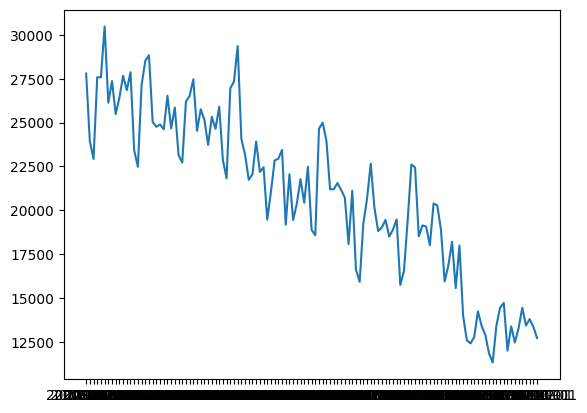

In [ ]:
plt.plot(series_4)
plt.show()

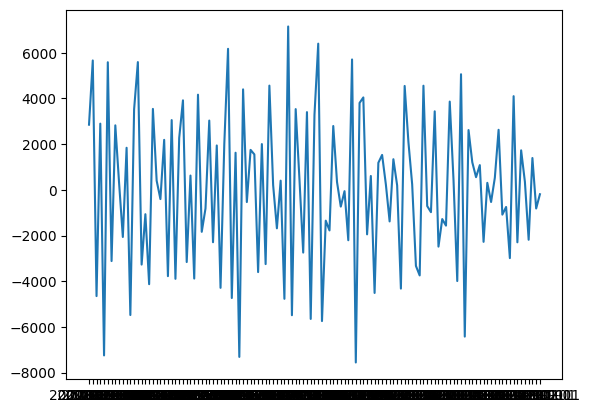

In [ ]:
plt.plot(series_4_diff)
plt.show()

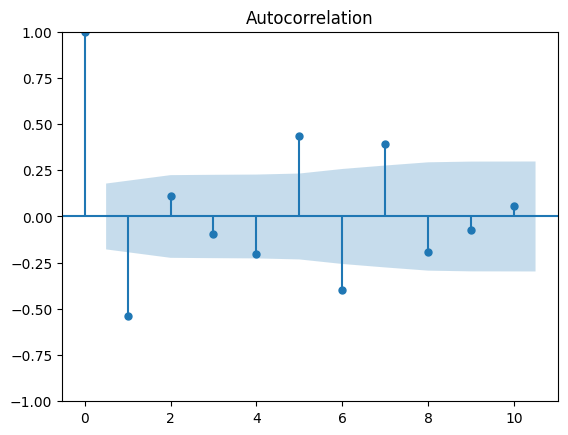

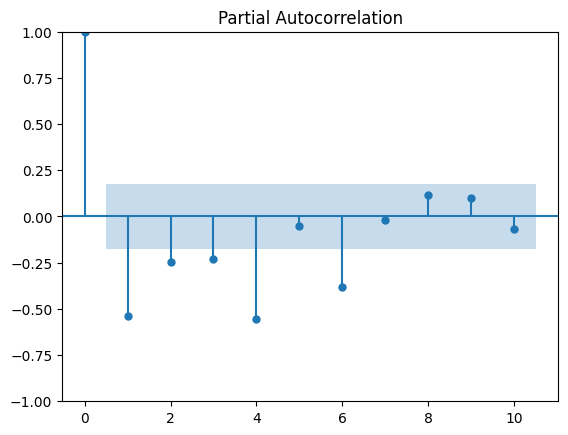

In [ ]:
plot_acf(series_4_diff, lags=10)
plot_pacf(series_4_diff, lags=10)
plt.show()

In [ ]:
ar_orders=[1,4,6,10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
  ar_model = ARIMA(series_4_diff, order = (ar_order,0,0))
  model_fit = ar_model.fit()
  fitted_model_dict[f"AR{ar_order}"] = model_fit


for ar_order in ar_orders:
  print(f'AIC for AR({ar_order}):' , fitted_model_dict[f"AR{ar_order}"].aic)
  print(f'BIC for AR({ar_order}):' , fitted_model_dict[f"AR{ar_order}"].bic)
  print("****************************************")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

AIC for AR(1): 2270.9154007688535
BIC for AR(1): 2279.3027724056437
****************************************
AIC for AR(4): 2206.857083603267
BIC for AR(4): 2223.6318268768473
****************************************
AIC for AR(6): 2172.0392833206597
BIC for AR(6): 2194.4056076854336
****************************************
AIC for AR(10): 2174.6085702414307
BIC for AR(10): 2208.1580567885917
****************************************
